In [3]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
from textblob import TextBlob 
import re

In [5]:
# Load your Dataset 
df = pd.read_csv('tweets_v8.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [6]:
df.shape

(80019, 12)

In [7]:
df = df.drop(columns='user_location', axis=1)

In [8]:
print(df.isnull().sum())

user_name              4
user_description    5211
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 0
is_retweet             0
dtype: int64


In [9]:
df = df.drop(columns='user_description', axis=1)
df = df.dropna()

In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DSN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


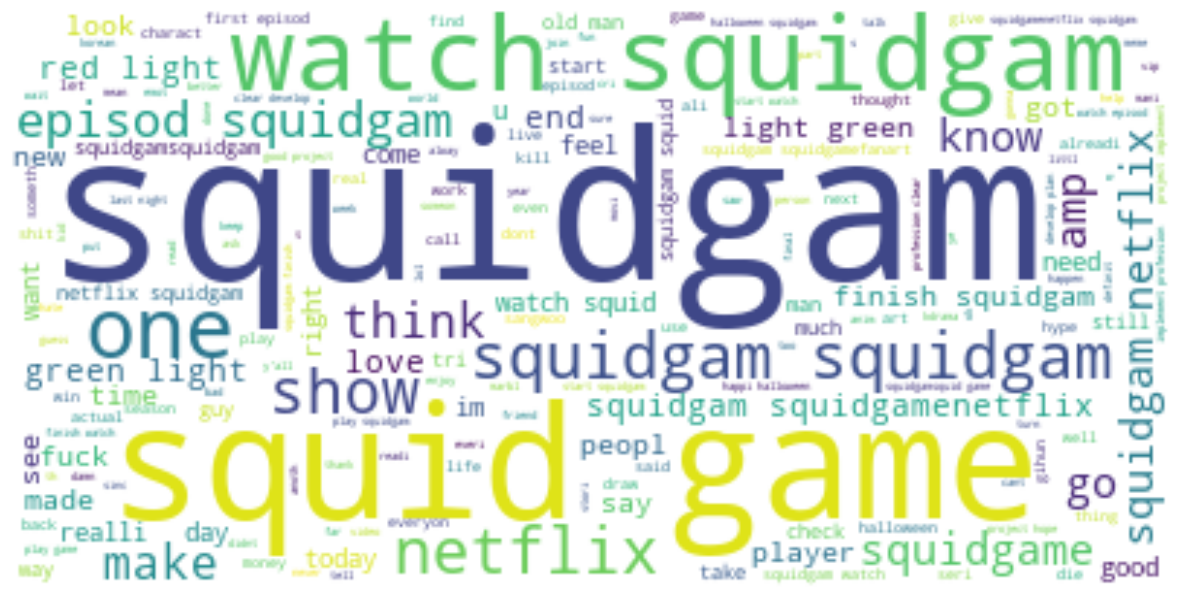

In [14]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud , STOPWORDS 
#combine preprocessed text into a single string 
text = ''.join(i for i in df.text)

# set up stopwords 
stopwords = set(STOPWORDS)

#Generate the word Cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

# plot the word cloud 
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# download the vader_lexicon
nltk.download('vader_lexicon')
# initialise the SentimentIntensityAnalyzer 
sentiments = SentimentIntensityAnalyzer()

#Calculate sentiment scores for each text and create new columns 
df['Positive'] = [sentiments.polarity_scores(i) ['pos'] for i in df['text']]
df['Negative'] = [sentiments.polarity_scores(i) ['neg'] for i in df['text']]
df['Neutral'] = [sentiments.polarity_scores(i) ['neu'] for i in df['text']]

# Select relevant columns 
df = df[['text', 'Positive', 'Negative', 'Neutral']]
# print the first few rows of the dataframe 
print(df.head)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DSN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<bound method NDFrame.head of                                                     text  Positive  Negative  \
0      life hit time poverti strike yougong yoo  let ...     0.173     0.108   
1                        marbl episod squidgam  ruin 😭😭😭     0.000     0.487   
2                                          squidgam time     0.000     0.000   
3      blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4      two first game player kill mask guy  bloodi ni...     0.000     0.461   
...                                                  ...       ...       ...   
80014  yes yes yesarianagrandesquidgam  outerwear pro...     0.435     0.000   
80015  squid game review revaaa squidgam review anyth...     0.000     0.000   
80016  back amp forth squid game creator amp lebron j...     0.000     0.000   
80017  sort game think theyll play inevit make squidg...     0.211     0.000   
80018  venanciotaylor tracklist cala boca swifter gfv...     0.000     0.000   

       Ne

In [19]:
x = sum(df['Positive'])
y = sum(df['Negative'])
z = sum(df['Neutral'])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print('Positive')
    elif (b>a) and (b>c):
        print('Negative')
    else:
        print('Neutral')
sentiment_score(x, y, z)

Neutral


In [20]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)

Positive:  10604.55899999976
Negative:  5171.334000000031
Neutral:  64233.11800000302
